## Dissimilarity Analysis
### Required:
* data file bc_unsupervised.mat
* images: oval_V, oval_H, rectangular_H
* Hu_moment invariants


### !! Show how to load Variable Browser !!
* Show variables


### Load data and Visualize

In [1]:
# Load data
import scipy.io as sio
import numpy.matlib as nm
import matplotlib.pyplot as plt

#### Set up interactive plots:

In [2]:
%matplotlib notebook

In [3]:
# Loads data from FeGaPd composition spread
t = sio.loadmat('bc_unsupervised.mat')
cmp = t['CMP'] # Composition of samples
tth = t['TTH'] # Independent variable 2theta
xrd = t['XRD'] # Diffraction patterns

tth_ = nm.repmat(tth,xrd.shape[0],1)

In [ ]:
# Plot data
# plot all diffraction patterns at once.

plt.figure(1)
plt.clf()
plt.subplot(3,1,1)
plt.plot(tth_.T, xrd.T)
plt.xlabel(r'2$\theta$') # Use $$ to create latex equations

In [ ]:
# plot heatmap of diffraction patterns
plt.figure(1)
plt.subplot(3,1,2)
plt.pcolor(xrd)

In [ ]:
# plot one diffraction pattern.
plt.figure(1)
plt.subplot(3,1,3)
plt.plot(tth_[0,],xrd[49,])
plt.xlabel(r'2$\theta$')

### Investigate Dissimilarity Measures

In [4]:
#%%  ------- Measures -----------------------

# Create data sets for Scale Invariance example
# create data sets 1 and 2
xrd1 = xrd[189:196,] # data set 1
xrd2 = xrd[nm.arange(6,-1,-1),] # data set 2

<IPython.core.display.Javascript object>


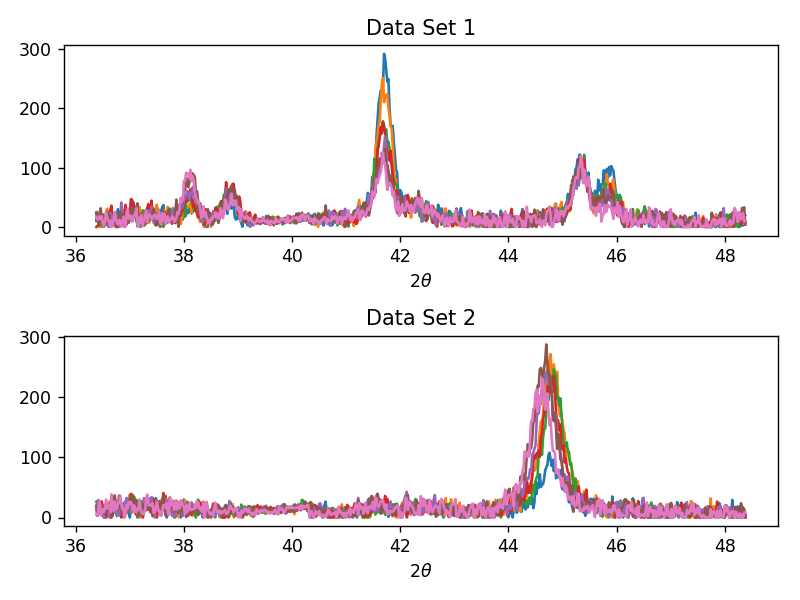

In [5]:
#%%
# plot data set 1
plt.figure(2)
plt.clf()
plt.subplot(2,1,1)
plt.plot(tth_[0:7,].T, xrd1.T);
plt.title('Data Set 1');
plt.xlabel(r'2$\theta$');

In [6]:
#%%
plt.figure(2)
plt.subplot(2,1,2)
plt.plot(tth_[0:7,].T, xrd2.T)
plt.title('Data Set 2');
plt.xlabel(r'2$\theta$');
plt.tight_layout()

In [7]:
#%%
# Compute dissimilarity matrices

# Combine data into one matrix.
s = nm.concatenate((xrd1, xrd2), axis=0) 
from sklearn.metrics.pairwise import pairwise_distances

# generate dissimilarity matrix for L1, "cityblock" or "taxicab"
d1 = pairwise_distances(s, metric='manhattan')

<IPython.core.display.Javascript object>


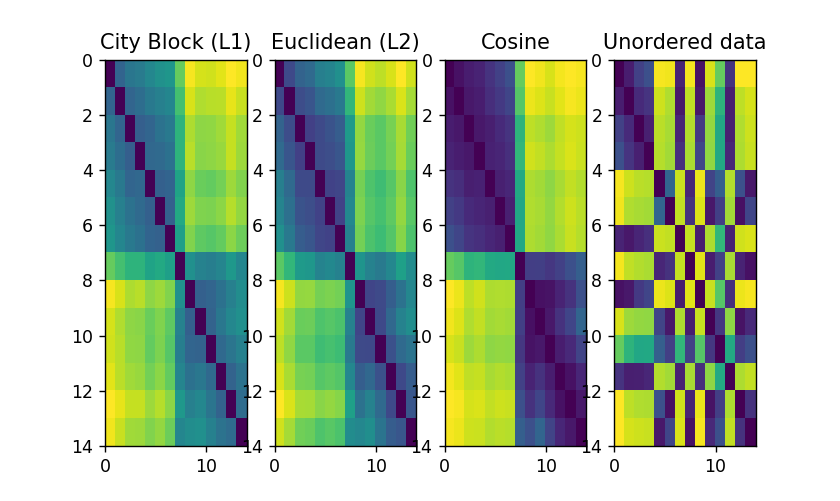

Text(0.5,1,'City Block (L1)')

In [8]:
#%% Visualize Dissimilarity matrix

# City Block (L1)
plt.figure(3)
plt.clf()
plt.subplot(1,4,1)
plt.pcolor(d1)
plt.gca().invert_yaxis()
plt.title('City Block (L1)')

In [9]:
#%%
# generate dissimilarity matrix for L2, "Euclidean"
d2 = pairwise_distances(s, metric='euclidean')

# generate dissimilarity matrix for cosine metric.
d3 = pairwise_distances(s, metric='cosine')


In [10]:
#%% Visualize Dissimilarity matrices

# Euclidean
plt.figure(3)
plt.subplot(1,4,2)
plt.pcolor(d2)                            # View as heatmap
plt.gca().invert_yaxis()
plt.title('Euclidean (L2)')

# And Cosine
plt.figure(3)
plt.subplot(1,4,3)
plt.pcolor(d3)                            # View as heatmap
plt.gca().invert_yaxis()
plt.title('Cosine')

Text(0.5,1,'Cosine')

### The heatmap looks block diagonal because the samples are in order based on their phase type. Can reorder to see what heatmap looks like if we don't know correct ordering of samples.

In [11]:
# randomly permute the numbers from 1 to 14.
p = nm.random.permutation(14)

# compute the dissimilarity matrix for permuted data.
d4 = pairwise_distances( s[p,:] , metric='cosine')

# Visualize Dissimilarity matrix
plt.figure(3)
plt.subplot(1,4,4)
plt.pcolor(d4)
plt.gca().invert_yaxis()
plt.title('Unordered data')

Text(0.5,1,'Unordered data')

### Using dissimilarity measures in a feature space. Assume features are first extracted from image using one of the techniques from yesterday.

In [12]:
#%% Dissimilarity in feature space - Moment Invariants
from scipy import misc
from imageio import imread

# load the images
im1 = imread('Oval_H.png')
im2 = imread('Oval_V.png')
im3 = imread('Rectangular_H.png')

<IPython.core.display.Javascript object>


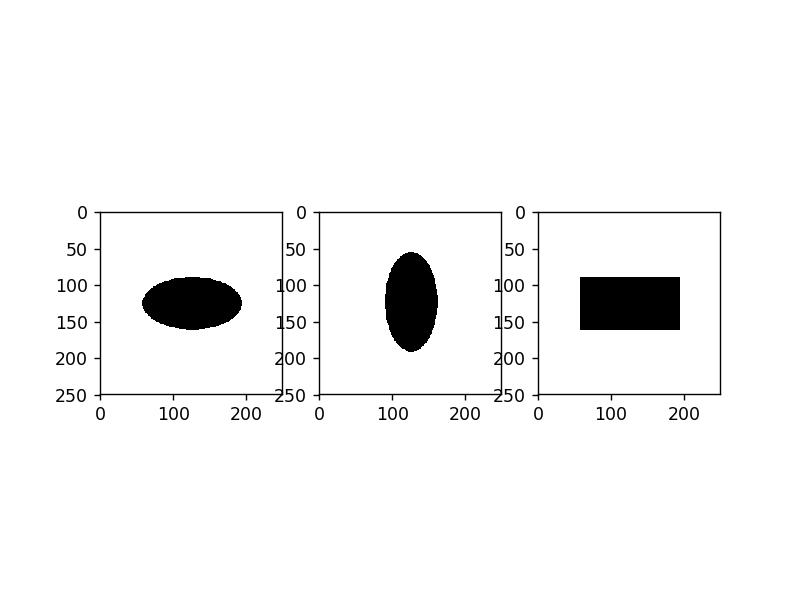

In [13]:
#%% plot the images
plt.figure(4)
plt.clf()
plt.subplot(1,3,1)
plt.imshow(im1)

plt.subplot(1,3,2)
plt.imshow(im2)

plt.subplot(1,3,3)
plt.imshow(im3)

<IPython.core.display.Javascript object>


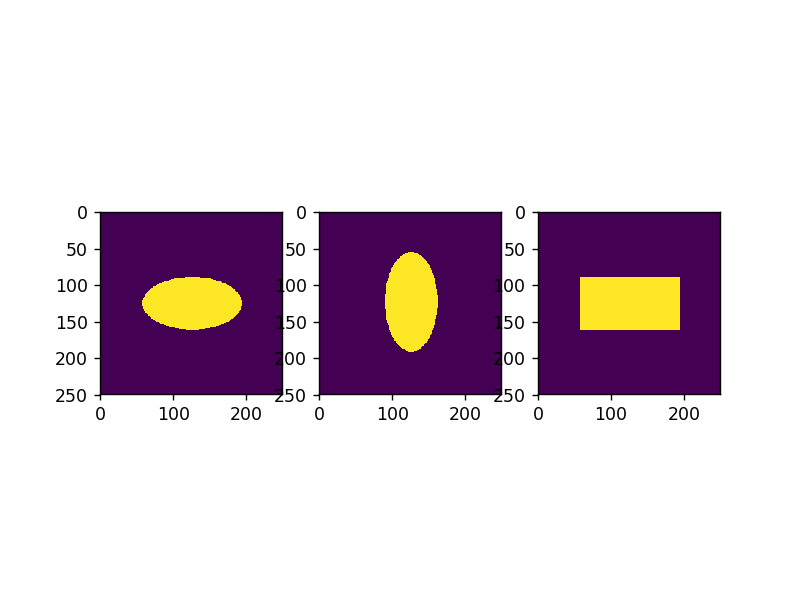

In [14]:
#%% convert the images into binary masks
# 1 inside shape, 0 outside
mask1 = im1[:,:,1] < 255;
mask2 = im2[:,:,1] < 255;
mask3 = im3[:,:,1] < 255;

# combine images in one matrix to speed up analysis
mask = nm.dstack((1.*mask1,1.*mask2,1.*mask3)) 

# plot the masks
plt.figure(5)
plt.clf()
plt.subplot(1,3,1)
plt.imshow(mask[:,:,0])

plt.subplot(1,3,2)
plt.imshow(mask[:,:,1])

plt.subplot(1,3,3)
plt.imshow(mask[:,:,2])

## Compute the Hu moment invariants - invariant to translation, scale, and rotation.
### Uses code from scikit-image: http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.moments_hu

### Definition: https://en.wikipedia.org/wiki/Image_moment#Rotation_invariants

In [15]:
import skimage.measure

hu = nm.zeros((3,7))
for i in range(0,3):
    nu = skimage.measure.moments_central(mask[:,:,i],125.5,125.5)
    nu = skimage.measure.moments_normalized(nu)
    hu[i,:] = skimage.measure.moments_hu(nu)
    
# initialize variable for absolute moment invariants
ami = nm.zeros((3,2))
ami[:,0] = 2./hu[:,0]

ami[:,1] = 4./( nm.power(hu[:,0],2) - hu[:,1] )

C:\Users\Boo\Anaconda3\lib\site-packages\skimage\measure\_moments.py:258: UserWarning: Using deprecated 2D-only, xy-coordinate interface to moments_central. This interface will be removed in scikit-image 0.16. Use moments_central(image, center=(cr, cc), order=3).
  warn(message)


<IPython.core.display.Javascript object>


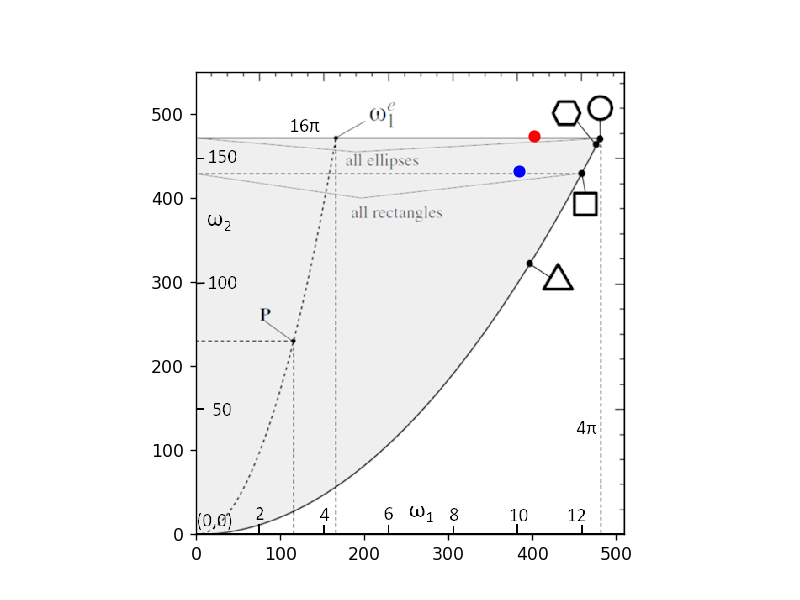

In [16]:
#%% Plot Each shape onto the moment invariant plot.
bg = imread('moment_invariant_plot.png')

plt.figure(6)
plt.clf()

# plot the moment invariant figure as a background 
plt.imshow(nm.flipud(bg), origin='lower')

In [17]:
#%% plot the ovals using moment invariants.
plt.figure(6)
plt.plot(ami[0:1,0] * 310/8,ami[0:1,1]*300/100,'ro')

# plot the rectangle using moment invariants.
plt.plot(ami[2,0] * 310/8,ami[2,1]*300/100,'bo')